In [ ]:
!pip install pandas

In [1]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import json
import time
import random
import os
import logging
from datetime import datetime
import os
import sys
import requests
import pandas as pd
import re

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_1412\1378756733.py:13: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [15]:
# 폴더 경로
folder_path = "./list/parted/" # 실제 폴더 경로로 변경해주세요.

# 최종 결과를 저장할 딕셔너리
result = {}

for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            for key, value in data.items():
                if key in result:
                    continue
                else:
                    result[key] = value

# 최종 결과를 JSON 파일로 저장
with open('./list/parted/list.json', 'w', encoding='utf-8') as f:
    json.dump(result, f, ensure_ascii=False, indent=4)


In [3]:
def apply_logic(html_file, json_file):
    # 이 곳에 로직을 적용하세요.
    pass

# 폴더 경로
folder_path = "./page/" # 실제 폴더 경로로 변경해주세요.

html_files = {f[:-5] for f in os.listdir(folder_path) if f.endswith('.html')}
json_files = {f[:-5] for f in os.listdir(folder_path) if f.endswith('.json')}

# for pk in (html_files & json_files):
#     html_file = os.path.join(folder_path, f"{pk}.html")
#     json_file = os.path.join(folder_path, f"{pk}.json")
    
    # apply_logic(html_file, json_file)


In [4]:
def open_json(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        return json.load(f)
def open_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        contents = f.read()
    return BeautifulSoup(contents, 'html.parser')

In [49]:
json_list = open_json("./list/parted/list.json")
for pk in (html_files & json_files):
    html_file = os.path.join(folder_path, f"{pk}.html")
    json_file = os.path.join(folder_path, f"{pk}.json")
    json_description = open_json(json_file)
    json_info = json_list.get(pk)
    html_soup = open_html(html_file)
    # print(json_list)


    break

In [81]:
# 화폐 단위를 알아봅시다.
json_list = open_json("./list/parted/list.json")
currs = set()
for pk in tqdm((html_files & json_files)):
    html_file = os.path.join(folder_path, f"{pk}.html")
    json_file = os.path.join(folder_path, f"{pk}.json")
    json_description = open_json(json_file)
    # json_info = json_list.get(pk)
    # html_soup = open_html(html_file)
    # print(json_list)
    curr = json_description["price_text"]["data"]["pricing_result"]["price"]["currency"]
    currs.add(curr)

100%|██████████| 60130/60130 [01:15<00:00, 798.01it/s]


In [24]:
json_info

{'_class': 'course',
 'id': 4032506,
 'title': 'Certification PHP & MYSQL | ATELIERS PRATIQUES 2024',
 'url': '/course/certificationtm-php-mysql-ateliers-pratiques/',
 'is_paid': True,
 'visible_instructors': [{'_class': 'user',
   'id': 141699650,
   'title': 'Digital Innovation | Les Experts',
   'name': 'Digital Innovation',
   'display_name': 'Digital Innovation | Les Experts',
   'job_title': 'Créateur de contenu numérique sur mesure',
   'image_50x50': 'https://img-c.udemycdn.com/user/50x50/141699650_55fb_12.jpg',
   'image_100x100': 'https://img-c.udemycdn.com/user/100x100/141699650_55fb_12.jpg',
   'initials': 'D|',
   'url': '/user/digital-innovation-hubs/'}],
 'image_125_H': 'https://img-c.udemycdn.com/course/125_H/4032506_a7d1_2.jpg',
 'image_240x135': 'https://img-c.udemycdn.com/course/240x135/4032506_a7d1_2.jpg',
 'is_practice_test_course': False,
 'image_480x270': 'https://img-c.udemycdn.com/course/480x270/4032506_a7d1_2.jpg',
 'published_title': 'certificationtm-php-mysq

In [70]:
json_info.keys()

dict_keys(['_class', 'id', 'title', 'url', 'is_paid', 'visible_instructors', 'image_125_H', 'image_240x135', 'is_practice_test_course', 'image_480x270', 'published_title', 'tracking_id', 'locale', 'headline', 'num_subscribers', 'caption_locales', 'avg_rating', 'avg_rating_recent', 'rating', 'num_reviews', 'is_wishlisted', 'num_published_lectures', 'num_published_practice_tests', 'image_50x50', 'image_100x100', 'image_304x171', 'image_750x422', 'is_in_user_subscription', 'has_closed_caption', 'caption_languages', 'created', 'instructional_level', 'instructional_level_simple', 'content_length_practice_test_questions', 'is_user_subscribed', 'buyable_object_type', 'published_time', 'objectives_summary', 'is_recently_published', 'last_update_date', 'preview_url', 'learn_url', 'is_in_personal_plan_collection', 'is_in_premium', 'has_508_closed_captions', 'is_coding_exercises_badge_eligible', 'predictive_score', 'relevancy_score', 'input_features', 'lecture_search_result', 'curriculum_lectures

In [5]:
str2level = {
    "초급자" : "BEGINNER",
    "중급자" : "INTERMEDIATE",
    "전문가" : "EXPERT",
    "모든 수준" : "ALL",
}
currency2won = {
    "CAD" : 996.94,
    "USD" : 1339.35
}

In [41]:
json_description["slider_menu"]

{'data': {'title': 'Certification PHP & MYSQL | ATELIERS PRATIQUES 2024',
  'badge_family': None,
  'is_free_seo_exp': False,
  'rating': 4.3555665,
  'num_reviews': 21,
  'num_students': 1122,
  'showCodingExercisesBadge': False,
  'is_coding_exercises_badge_eligible': False}}

In [54]:
temp = json_description["curriculum_context"]["data"]["sections"]
total_time = 0
for section in temp:
    total_time += section["content_length"]
int(total_time//60)

476

In [92]:
price_dic = json_description["price_text"]["data"]["pricing_result"]["price"]
sale_price_dic = json_description["price_text"]["data"]["pricing_result"]["list_price"]
int(currency2won.get(price_dic["currency"])*price_dic["amount"])//5000*5000
int(currency2won.get(sale_price_dic["currency"])*sale_price_dic["amount"])//5000*5000

25000

In [103]:
section

{'content_length_text': '19:58',
 'content_length': 1198.5,
 'index': 1,
 'items': [{'can_be_previewed': True,
   'content_summary': '01:20',
   'description': '',
   'id': 39245446,
   'icon_class': 'udi udi-video',
   'is_coding_exercise': False,
   'has_linked_workspace': False,
   'landing_page_url': None,
   'video_asset_id': 50570290,
   'preview_url': '/course/4032506/preview/?startPreviewId=50570290',
   'learn_url': '/course/certificationtm-php-mysql-ateliers-pratiques/learn/lecture/39245446',
   'title': 'Bienvenue !!',
   'object_index': 1,
   'item_type': 'lecture'},
  {'can_be_previewed': True,
   'content_summary': '02:11',
   'description': '',
   'id': 41574344,
   'icon_class': 'udi udi-video',
   'is_coding_exercise': False,
   'has_linked_workspace': False,
   'landing_page_url': None,
   'video_asset_id': 53566870,
   'preview_url': '/course/4032506/preview/?startPreviewId=53566870',
   'learn_url': '/course/certificationtm-php-mysql-ateliers-pratiques/learn/lecture

In [112]:
json_description["curriculum_context"]["data"]["sections"][0].keys()

dict_keys(['content_length_text', 'content_length', 'index', 'items', 'lecture_count', 'title'])

In [14]:
print(json_dic.keys())
print(json_dic["slider_menu"])

dict_keys(['price_text', 'curriculum_context', 'slider_menu', 'reviews', 'subcategory'])
{'data': {'title': 'Artırılmış Gerçeklik-2', 'badge_family': None, 'is_free_seo_exp': False, 'rating': 4.368188, 'num_reviews': 43, 'num_students': 376, 'showCodingExercisesBadge': False, 'is_coding_exercises_badge_eligible': False}}


['111', '222']

In [126]:
lecture = {}

sections = json_description["curriculum_context"]["data"]["sections"]
total_time = 0
for section in sections:
    total_time += section["content_length"]

landing_page = html_soup.find("div",class_="paid-course-landing-page__body")
landing_page
what_you_learn = landing_page.find("ul",class_=[
    "ud-unstyled-list",
    "ud-block-list",
    "what-you-will-learn--objectives-list--eiLce",
    "what-you-will-learn--objectives-list-two-column-layout--rZLJy"
])

curriculum = {}
curriculum["curriculum"] = []
for section in sections:
    temp = {}
    temp["time"] = int(section["content_length"]//60)
    temp["item_count"] = section["lecture_count"]
    temp["title"] = section["title"]
    items = []
    for item in section["items"]:
        items.append({
            "title" : item["title"],
            "time" : item["content_summary"]
        })
    temp["items"] = items
    curriculum["curriculum"].append(temp)


lecture["lecture_id"] = 1
lecture["site_lecture_id"] = f"u{json_info["id"]}"
lecture["name"] = json_info["title"]
lecture["image"] = json_info["image_750x422"]
lecture["category_name"] # 을 넣어놓으면 조인해서 id받아올수있다. 
# lecture["category_id"]
lecture["price_original"] = int(currency2won.get(price_dic["currency"])*price_dic["amount"])//5000*5000
lecture["price_sale"] = int(currency2won.get(sale_price_dic["currency"])*sale_price_dic["amount"])//5000*5000
lecture["level"] = str2level[json_info["instructional_level_simple"]]
lecture["summary"] = "||".join(list(map(lambda x:x.text, what_you_learn)))
lecture["description_summary"] = json_info["headline"]
# lecture["description_detail"] html이라 일단 더미
lecture["site_review_rating"] = json_description["slider_menu"]["data"]["rating"]
lecture["site_review_count"] = json_description["slider_menu"]["data"]["num_reviews"]
lecture["site_student_count"] = json_description["slider_menu"]["data"]["num_students"]
lecture["review_sum"] = 0
lecture["review_count"] = 0
lecture["total_time"] = int(total_time//60)
lecture["curriculum"] = curriculum
lecture["instructor"] = json_info["visible_instructors"][0]["title"]
lecture["site_type"] = "UDEMY"
lecture["site_link"] = f"https://udemy.com{json_info["url"]}"
# lecture["gpt_review_good"] = 
# lecture["gpt_review_bad"] = 
# lecture["create_time"] = 
# lecture["update_time"] = 

lecture

{'lecture_id': 'https://img-c.udemycdn.com/course/750x422/4032506_a7d1_2.jpg',
 'level': 'BEGINNER',
 'site_type': 'UDEMY',
 'site_lecture_id': 'u4032506',
 'name': 'Certification PHP & MYSQL | ATELIERS PRATIQUES 2024',
 'price_original': 25000,
 'price_sale': 25000,
 'summary': 'Vous apprendrez à utiliser toutes les nouveautés de PHP||Vous apprendrez à utiliser des boucles||Vous apprendrez à faire des opérations||Vous apprendrez à utiliser des bases de données||Vous apprendrez à utiliser des conditions||Vous apprendrez à utiliser des variables||Installer et mettre à jour MySQL||Comprendre et décrire l’architecture de MySQL||Administrer et configurer MySQL||Comprendre et mettre en oeuvre les différents moteurs de stockage (InnoDB, MyISAM, MEMORY, CSV...)||Comprendre et mettre en œuvre la réplication sous MySQL||Comprendre et décrire les techniques d’optimisation de MYSQL||Découvrez les principales requêtes SQL et apprenez à gérer des données en base',
 'description_summary': 'Apprenez 

In [127]:
curriculum

{'curriculum': [{'time': 19,
   'item_count': 7,
   'title': 'Introduction',
   'items': [{'title': 'Bienvenue !!', 'time': '01:20'},
    {'title': 'Dr. Firas Partenaire formateur Udemy en 2024', 'time': '02:11'},
    {'title': 'Présentation rapide : "Qui suis-je ?"', 'time': '03:10'},
    {'title': 'Les méthodes et outils pédagogiques de la formation',
     'time': '05:54'},
    {'title': 'FAQ Udemy', 'time': '01:28'},
    {'title': 'Architecture du modèle PHP', 'time': '05:54'},
    {'title': 'Support de cours', 'time': '00:01'}]},
  {'time': 334,
   'item_count': 30,
   'title': 'PART 1- Les bases du PHP',
   'items': [{'title': 'Architecture à trois niveaux ou Architecture à trois couches',
     'time': '06:32'},
    {'title': 'Serveur MAMP - Top des alternatives à XAMPP pour Windows et Mac',
     'time': '20:10'},
    {'title': 'Écrivez votre premier script - Les balises PHP',
     'time': '11:17'},
    {'title': "L'instruction echo", 'time': '06:30'},
    {'title': 'Les varia

# html 만들기

In [55]:
base_html = open_html("./udemy_base.html")


In [51]:
landing_page = html_soup.find("div",class_="paid-course-landing-page__body")

In [52]:
prerequisites = landing_page.find(string="요구 사항").find_previous('div', {'class': 'component-margin'})
prerequisites.find("svg").decompose()
prerequisites.find("span")["data-checked"] = "checked"


In [53]:
descriptions = landing_page.find(string="설명").find_previous("div")
descriptions.find("span")["data-checked"] = "checked"
descriptions.find("svg").decompose()
descriptions.find("button",{"aria-label":"설명 더 보기"}).decompose()

<!DOCTYPE html>

<html lang="ko-kr">
<head>
<!-- 1 -->
<style>
        :root {
            --font-stack-heading-serif: SuisseWorks, Georgia, Times, 'Times New Roman', serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol';
            --font-stack-heading: 'Udemy Sans', -apple-system, BlinkMacSystemFont, Roboto, 'Segoe UI', Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol';
            --font-stack-text: 'Udemy Sans', 'SF Pro Text', -apple-system, BlinkMacSystemFont, Roboto, 'Segoe UI', Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol';
            --color-gray-600: #101112;
            --color-gray-550: #1c1d1f;
            --color-gray-500: #2d2f31;
            --color-gray-400: #3e4143;
            --color-gray-300: #6a6f73;
            --color-gray-250: #9da3a7;
            --color-gray-200: #d1d7dc;
            --color-gray-150: #e4e8eb;
            --color-gray-100: #f7f9fa;
            --color-red
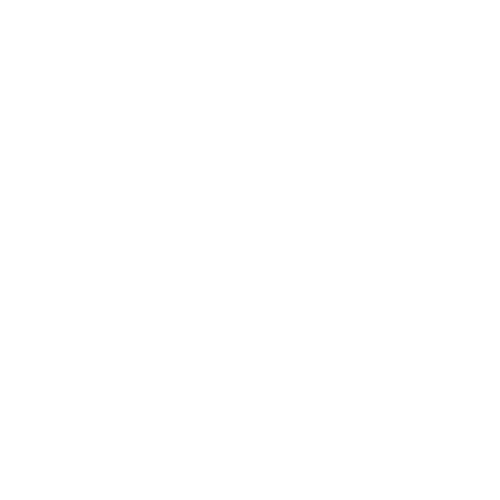

In [56]:
base_html.find("div", class_="course-landing-page__main-content").append(prerequisites)
base_html.find("div", class_="course-landing-page__main-content").append(descriptions)
base_html

In [ ]:
# "\\"을 "\\\\"로 변경
modified_str = re.sub(r"\\", r"\\\\", str(base_html))
# 변경된 문자열을 다시 뷰티풀숲 객체로 파싱
modified_soup = BeautifulSoup(modified_str, 'html.parser')
modified_soup

In [62]:
with open(f"./html_files/{1}.html", "w", encoding="utf-8") as f:
    f.write(str(modified_soup))

# 오류분석


<!DOCTYPE html>

<html lang="ko-kr">
<head>
<title>PostGIS Eğitimi Türkçe - Postgis in Turkish | Udemy</title>
<script nonce="F7b9LY/9RJDhnEtC0GYSZu2pyTFl21O9w0v66zYtBZQ=" type="text/javascript">
        // Note: must be called before google tag manager is initialized in OptanonWrapper()
        if (typeof window.dataLayer == 'undefined') {
            window.dataLayer = window.dataLayer || [];
        }

        function callGtag() {
            window.dataLayer.push(arguments);
        }

        var GRANTED = 'granted';
        var DENIED = 'denied';

        window.optOutConsent = {
            ad_storage: GRANTED,
            analytics_storage: GRANTED,
            functionality_storage: GRANTED,
            personalization_storage: GRANTED,
            security_storage: GRANTED
        }

        window.optInConsent = {
            ad_storage: DENIED,
            analytics_storage: DENIED,
            functionality_storage: DENIED,
            personalization_storage: DENIED,
  
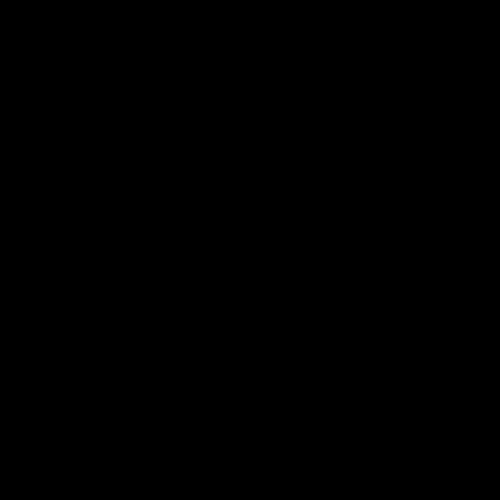
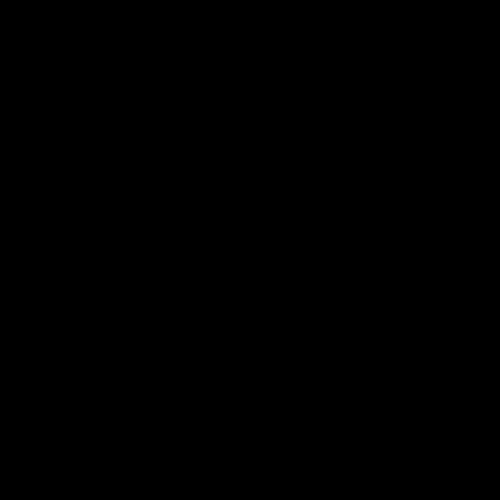

In [5]:
html_soup = open_html("./page/1251020.html")
html_soup

In [80]:
html_soup.find(string="요구 사항").find_previous('div', {'class': 'component-margin'})

<div class="component-margin"><div class="accordion-panel-module--panel--3_kkG"><span data-checked="" data-type="checkbox" id="u65-accordion-panel--7" style="display:none"></span><div class="ud-btn ud-btn-large ud-btn-link ud-heading-xl ud-accordion-panel-toggler accordion-panel-module--panel-toggler--1RjML accordion-panel-module--outer-panel-toggler--AgeEB" data-css-toggle-id="u65-accordion-panel--7"><h3 class="ud-accordion-panel-heading"><button aria-disabled="false" aria-expanded="false" class="ud-btn ud-btn-large ud-btn-link ud-heading-xl js-panel-toggler accordion-panel-module--panel-toggler--1RjML" id="u65-accordion-panel-title--8" type="button"><span class="ud-accordion-panel-title">요구 사항</span></button></h3><svg aria-hidden="true" class="ud-icon ud-icon-medium ud-icon-color-neutral accordion-panel-module--expand-icon--2DZax" focusable="false"><use xlink:href="#icon-expand"></use></svg></div><div aria-hidden="true" aria-labelledby="u65-accordion-panel-title--8" class="accordion-

In [81]:
descriptions = html_soup.find(string="설명").find_previous("div")
descriptions

<div class="ud-text-sm component-margin styles--description--33-vq" data-purpose="course-description"><h2 class="ud-heading-xl styles--description__header--2Z7Vb" data-purpose="description-title">설명</h2><div class="show-more-module--container--2QPRN"><span data-checked="" data-type="checkbox" id="u65-show-more--9" style="display:none"></span><div class="show-more-module--content--cjTh0 show-more-module--with-gradient--1ZDrA" style="max-height:22.1rem"><div tabindex="-1"><div data-purpose="safely-set-inner-html:description:description"><p>What will be in the course:​</p><ul><li><p>Personal experience;​</p></li><li><p>How I structured the work in my team;​</p></li><li><p>What my team and I use;​</p></li><li><p>What are the alternatives to my tools.​</p></li></ul><p>What this course will not include:​</p><ul><li><p>A huge amount of theory;​</p></li><li><p>Calculations that prove how to design;​</p></li><li><p>Imposing opinions and proving that problems need to be solved only this way and 

<!DOCTYPE html>

<html lang="ko-kr">
<head>
<!-- 1 -->
<style>
        :root {
            --font-stack-heading-serif: SuisseWorks, Georgia, Times, 'Times New Roman', serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol';
            --font-stack-heading: 'Udemy Sans', -apple-system, BlinkMacSystemFont, Roboto, 'Segoe UI', Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol';
            --font-stack-text: 'Udemy Sans', 'SF Pro Text', -apple-system, BlinkMacSystemFont, Roboto, 'Segoe UI', Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol';
            --color-gray-600: #101112;
            --color-gray-550: #1c1d1f;
            --color-gray-500: #2d2f31;
            --color-gray-400: #3e4143;
            --color-gray-300: #6a6f73;
            --color-gray-250: #9da3a7;
            --color-gray-200: #d1d7dc;
            --color-gray-150: #e4e8eb;
            --color-gray-100: #f7f9fa;
            --color-red
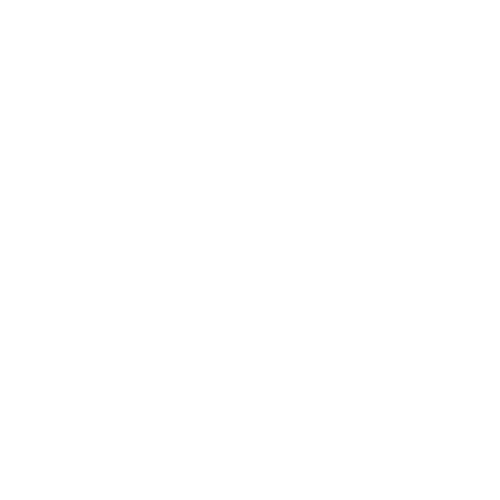

In [82]:
# landing_page = html_soup.find("div",class_="paid-course-landing-page__body")
# landing_page

if (html_soup.find(string="요구 사항")):
    prerequisites = html_soup.find(string="요구 사항").find_previous('div', {'class': 'component-margin'})
    prerequisites.find("svg").decompose()
    prerequisites.find("span")["data-checked"] = "checked"
    base_html.find("div", class_="course-landing-page__main-content").append(prerequisites)
if (html_soup.find(string="설명")):
    descriptions = html_soup.find(string="설명").find_previous("div")
    descriptions.find("span")["data-checked"] = "checked"
    descriptions.find("svg").decompose()
    descriptions.find("button",{"aria-label":"설명 더 보기"}).decompose()
    base_html.find("div", class_="course-landing-page__main-content").append(descriptions)
base_html